<a href="https://colab.research.google.com/github/cyongkypranowo/Predict-Real-Estate-with-Random-Forest-Algorithm/blob/main/Weekly_Assesment_1_TheWooz_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : House Pricing Prediction**

# **Objective** :
Sistem cerdas yang mampu memprediksi harga jual rumah dikawasan Ames, Lowa, Amerika Serikat

Sumber Data : [Link](https://drive.google.com/drive/folders/1mRSQ00rNqccQaR-LNi3nf3bRA6wNg-Fj)

#1. **Business & Data Understanding**

##**Business Understanding**


### **Latar Belakang Proyek**
Dalam dunia real estate, menentukan harga jual rumah yang akurat sangat penting untuk memastikan transaksi yang adil dan efisien bagi semua pihak terkait. Keseriusan dalam menetapkan harga rumah melalui sistem menjadi penting sebab sejauh ini penentuan harga sering kali hanya mengandalkan cara-cara konvensional yang kurang berbasis pada data yang mendalam dan lengkap. Hal ini mendorong perlunya pengembangan model prediktif yang dapat menganalisis dan memproyeksikan nilai jual properti berdasarkan berbagai fitur dan kondisi pasar.

1. Metode & Algoritma: Metode yang digunakan adalah regresi karena cocok untuk memprediksi nilai yang bersifat kontinu, dan algoritma Random Forest dipilih karena keunggulannya menangkap hubungan non-linear dan interaksi antar fitur dengan efektif.
2. Manfaat: Menjadi alat bantu bagi agen real estate, pembeli, dan penjual.
3. Harapan: Meningkatkan transparansi dan efisiensi dalam penentuan harga properti.

### **Tujuan Proyek**
Proyek ini bertujuan untuk membangun model prediktif yang dapat menentukan harga jual rumah di Ames, Lowa, US, dengan memanfaatkan dataset properti yang mencakup berbagai fitur seperti kelas bangunan (MSSubClass), jumlah kamar(Bedroom), tahun pembangunan(YearBuilt), dan lain-lain. Model ini diharapkan dapat membantu agen real estate, pembeli, dan penjual dalam memahami faktor-faktor yang mempengaruhi harga jual dan membuat keputusan yang lebih informatif dalam transaksi real estate.

### **Pertanyaan dari data yang didapat** :


1.   Fitur properti apa yang paling mempengaruhi harga jual rumah?
2.   Bagaimana kita dapat memprediksi harga jual rumah? (dengan tingkat akurasi yang tinggi)
3. Apakah model yang dibangun dapat memberikan insight untuk strategi penjualan atau pembelian properti?



## **Data Understanding**

### Deskripsi Dataset
Dataset Ames Housing terdiri dari data properti dengan 1460 entri dan 80 fitur yang mencakup informasi tentang hampir setiap aspek rumah dan lingkungannya, termasuk:

SalePrice: Harga jual properti dalam dolar. Ini adalah variabel target yang akan diprediksi.
YearBuilt: Tahun pembangunan properti.
Neighborhood: Lokasi fisik dalam batas kota Ames.
(dan lain-lain, mencakup detail eksterior dan interior properti, lokasi, fasilitas, dll.).

Detail 80 fitur ada pada source berikut : [link](https://docs.google.com/document/d/15XHL3zEmYPIHAOhctF8QBAUMWMjSaHrg/edit?usp=drive_link&ouid=113969898218396316984&rtpof=true&sd=true)

In [ ]:
#Panggil library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

In [ ]:
#Muat dataset
df_train = pd.read_csv('train.csv', sep=',', engine='python')
df_test = pd.read_csv('test.csv', sep=',', engine='python')

In [ ]:
#Cek Struktur Dataset
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Remove kolom yang tidak menyediakan informasi yang berguna
if 'Id' in df_train.columns:
    df_train.drop('Id', axis=1, inplace=True)

if 'Id' in df_test.columns:
    df_test.drop('Id', axis=1, inplace=True)

In [ ]:
# Tampilkan 5 baris pertama
df_train.head()
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Statistik deskriptif dalam kolom2 numerik
df_train.describe()
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# Periksa missing values
missing_train_values = df_train.isnull().sum()
missing_test_values = df_test.isnull().sum()

missing_train_values[missing_train_values > 0]
missing_test_values[missing_test_values > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
# Cek Duplikasi Data
df_train.duplicated().sum()
df_test.duplicated().sum()

0

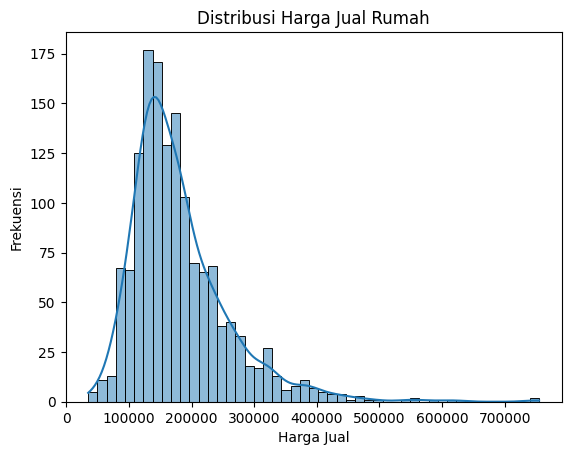

In [ ]:
# Visualisasi distribusi SalePrice
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribusi Harga Jual Rumah')
plt.xlabel('Harga Jual')
plt.ylabel('Frekuensi')
plt.show()

**Bentuk Distribusi**: Distribusi harga jual tampaknya miring ke kanan (positively skewed), artinya ada lebih banyak rumah dengan harga lebih rendah dibandingkan dengan harga yang lebih tinggi.

**Puncak Distribusi**: Titik tertinggi histogram menunjukkan modus rentang harga, yaitu rentang harga yang paling sering muncul dalam dataset.

**Ekor Distribusi**: Ada ekor yang panjang di sisi kanan, menunjukkan bahwa sedikit rumah memiliki harga yang sangat tinggi, yang dapat dianggap sebagai outliers

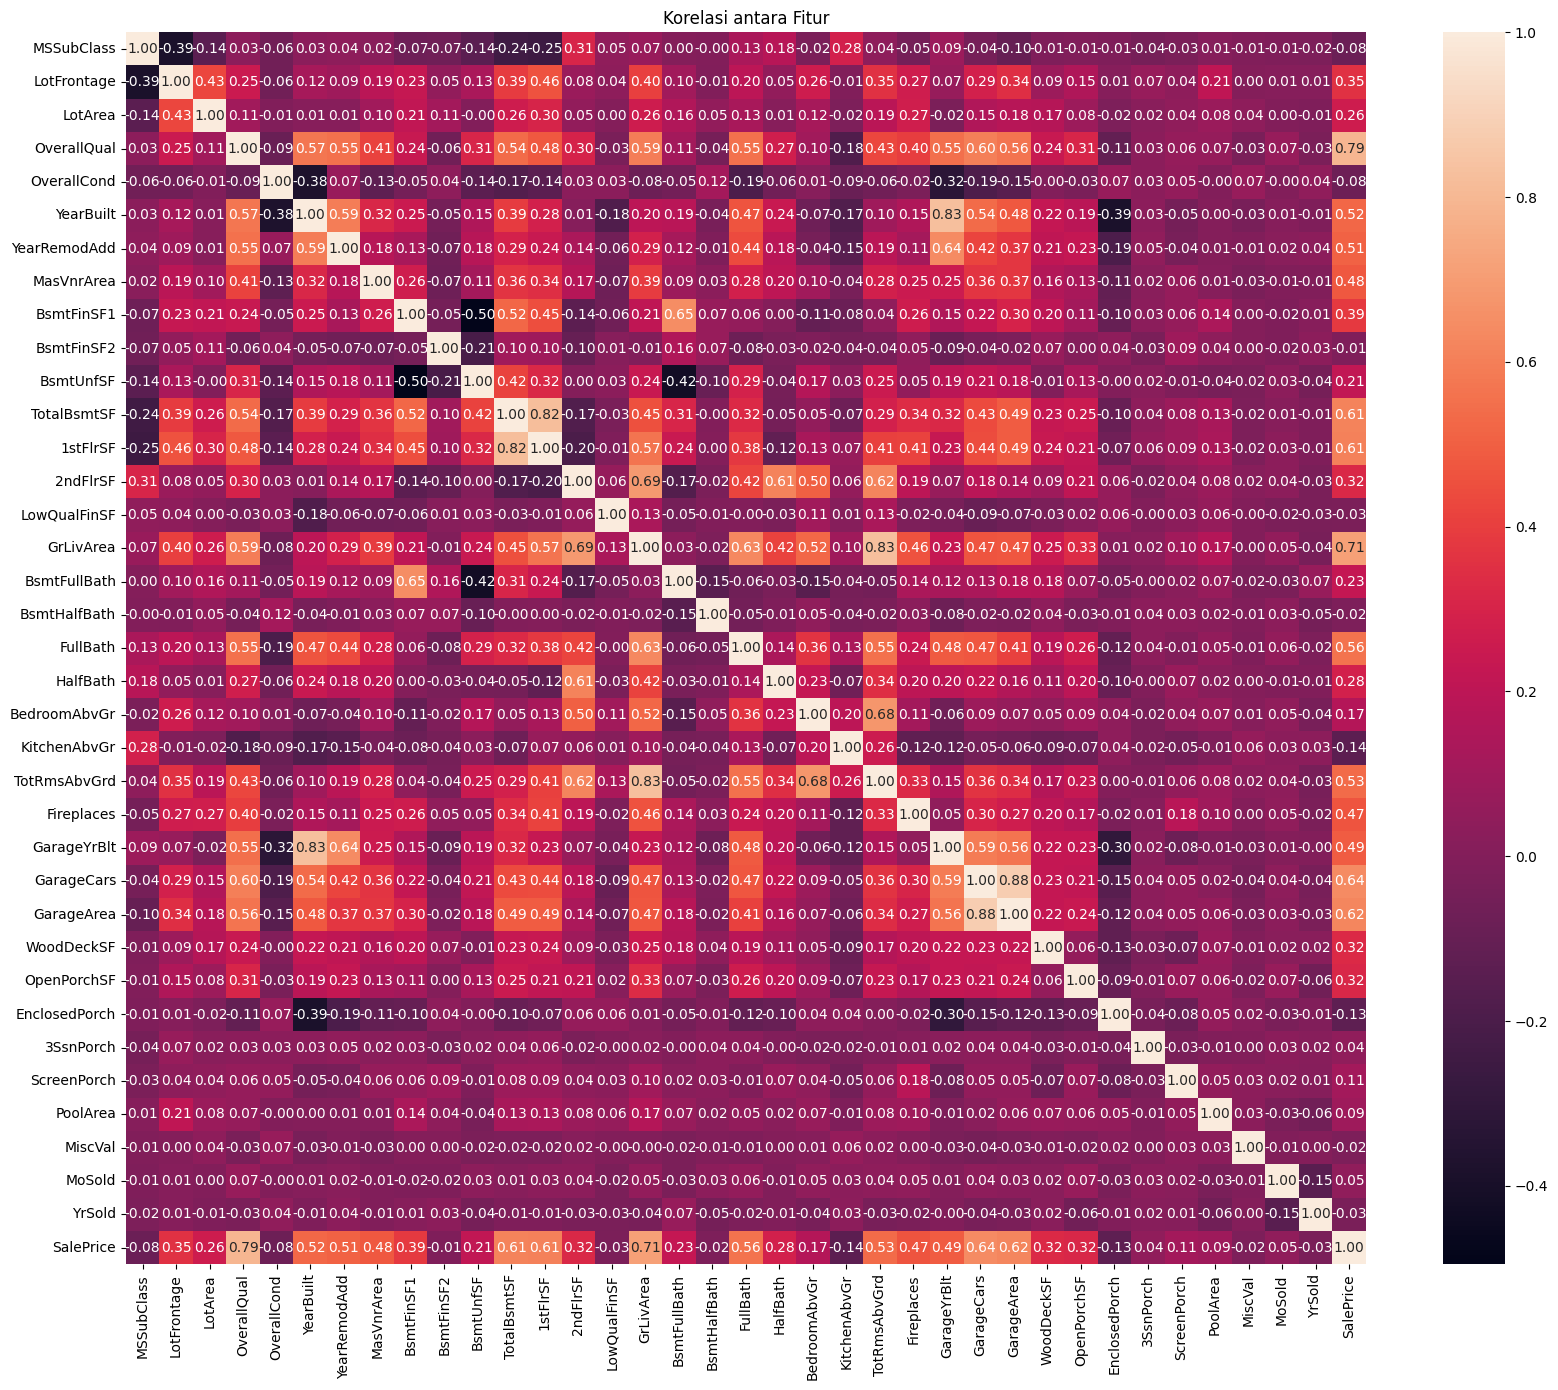

In [ ]:
df_train = df_train.select_dtypes(include=['number'])
df_test = df_test.select_dtypes(include=['number'])

# Korelasi antara fitur dan SalePrice
# matriks korelasi Pearson
corr_matrix = df_train.corr()

# set gambar ke dimensi 12x10
plt.figure(figsize=(20, 16))
# annot true = menampilkan angka korelasi pada kotak heatmap, fmt=.2f mengatur format angka ke 2 desimal
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Korelasi antara Fitur')
plt.show()

Nilai dalam matriks korelasi berkisar antara -1 hingga 1, di mana:

1 menunjukkan korelasi positif sempurna: Jika variabel A meningkat, variabel B juga meningkat dengan proporsi yang sama.
-1 menunjukkan korelasi negatif sempurna: Jika variabel A meningkat, variabel B menurun dengan proporsi yang sama.
0 menunjukkan tidak ada korelasi: Tidak ada hubungan linear antara variabel A dan B

Berdasarkan eksplorasi awal, beberapa catatan observasi seperti distribusi harga jual yang miring ke kanan, yang menunjukkan adanya outlier. Fitur seperti ***GrLivArea*** *dan* ***YearBuilt*** *mungkin memiliki korelasi yang kuat dengan* ***SalePrice***. Hipotesis awal bisa termasuk asumsi bahwa rumah dengan area yang lebih besar dan lebih baru cenderung dijual dengan harga yang lebih tinggi.


# 2. **Data Cleaning & Analysis**

## Data Cleaning

In [ ]:
# Evaluasi persentase missing values per kolom & drop yang persentase missing 50%
train_missing_percentage = df_train.isnull().mean() * 100
columns_to_drop = train_missing_percentage[train_missing_percentage > 50].index

test_missing_percentage = df_test.isnull().mean() * 100
columns_to_drop = test_missing_percentage[test_missing_percentage > 50].index



print("Kolom-kolom dengan lebih dari 50% nilai yang hilang:")
print(columns_to_drop)

Kolom-kolom dengan lebih dari 50% nilai yang hilang:
Index([], dtype='object')


In [ ]:
# Drop kolom yang persentase missing 50%
df_train.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# Evaluasi varians (sebaran data) dari fitur numerik
# Threshold varians menggunakan 0.01 misalnya
threshold_variance = 0.01
train_low_variance_filter = (df_train._get_numeric_data().var() < threshold_variance)
test_low_variance_filter = (df_test._get_numeric_data().var() < threshold_variance)

# Memilih kolom-kolom dengan variasi di bawah threshold (variasi sebaran data)
train_column_low_variance = df_train._get_numeric_data().columns[train_low_variance_filter]
test_column_low_variance = df_test._get_numeric_data().columns[test_low_variance_filter]

# Menampilkan kolom-kolom dengan variasi di bawah threshold
print("Kolom-kolom yang memiliki variasi di bawah threshold:")

if (len(train_column_low_variance) > 0) or (len(test_column_low_variance) > 0):
  print(train_column_low_variance, test_column_low_variance)
else:
  print('Tidak ada yang dibawah threshold')

# Hapus jika ada data yang dibawah threshold varians
# df_train.drop(labels=df_train.columns[low_variance_filter], axis=1, inplace=True)

Kolom-kolom yang memiliki variasi di bawah threshold:
Tidak ada yang dibawah threshold


In [ ]:
# Buat Dictionary yang berisi jumlah data unik kategorikal dalam setiap kolom
# Mendapatkan kolom kategorikal
train_categorical_cols = df_train.select_dtypes(include=['object']).columns
test_categorical_cols = df_test.select_dtypes(include=['object']).columns

# Buat dictionary untuk menyimpan jumlah nilai unik
unique_values_dict = {}

# Menampilkan jumlah nilai unik untuk setiap kolom kategorikal
for col in train_categorical_cols:
    unique_values_dict[col] = df_train[col].nunique()

for col in test_categorical_cols:
    unique_values_dict[col] = df_test[col].nunique()

# Urutkan dictionary berdasarkan nilai uniknya (dari yang paling tinggi ke yang paling rendah)
sorted_unique_values = dict(sorted(unique_values_dict.items(), key=lambda item: item[1], reverse=True))

# Tampilkan hasil yang sudah diurutkan
for col, count in sorted_unique_values.items():
    print(f"{col}: {count} nilai unik")

In [ ]:
# Evaluasi kolom kategorikal dengan jumlah kategori yang sangat tinggi
# Threshold kardinalitas menggunakan 25
cardinality_threshold = 25
train_high_cardinality_filter = [col for col in df_train.select_dtypes(include=['object']).columns if df_train[col].nunique() > cardinality_threshold]
test_high_cardinality_filter = [col for col in df_test.select_dtypes(include=['object']).columns if df_test[col].nunique() > cardinality_threshold]
# df_train.drop(high_cardinality_filter, axis=1, inplace=True)

In [ ]:
# Evaluasi fitur yang memiliki korelasi yang sangat tinggi satu sama lain
train_corr_matrix = df_train.corr().abs()
test_corr_matrix = df_test.corr().abs()

train_high_corr_var = np.where(corr_matrix > 0.8)
train_high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*train_high_corr_var) if x != y and x < y]

test_high_corr_var = np.where(corr_matrix > 0.8)
test_high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*test_high_corr_var) if x != y and x < y]


for (col1, col2) in train_high_corr_var:
  print(col1)
  df_train.drop(col1, axis=1, inplace=True)

for (col1, col2) in test_high_corr_var:
  print(col1)
  df_test.drop(col1, axis=1, inplace=True)

YearBuilt
TotalBsmtSF
GrLivArea
GarageCars
YearBuilt
TotalBsmtSF
GrLivArea
GarageCars


Tujuan dari proses ini adalah untuk mengurangi multikolinearitas dalam data, yang dapat mengganggu interpretasi model dan mempengaruhi kinerjanya. Dengan menghapus kolom yang memiliki korelasi tinggi, kita dapat meningkatkan interpretabilitas model dan menghindari overfitting

In [ ]:
# Handle missing values yang tersisa
# Untuk fitur2 numerik
for col in df_train.select_dtypes(include=np.number).columns:
    df_train[col].fillna(df_train[col].median(), inplace=True)

for col in df_test.select_dtypes(include=np.number).columns:
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [ ]:
# Handle missing values yang tersisa
# Untuk fitur2 kategorikal
for col in df_train.select_dtypes(include='object').columns:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

for col in df_test.select_dtypes(include='object').columns:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

In [ ]:
# Mencari dan mengatasi outliers dengan Z-Score
train_numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
test_numeric_cols = df_test.select_dtypes(include=[np.number]).columns.tolist()


train_df_numeric = df_train[train_numeric_cols]
test_df_numeric = df_train[test_numeric_cols]

train_z_scores = stats.zscore(train_df_numeric)
test_z_scores = stats.zscore(test_df_numeric)

train_abs_z_scores = np.abs(train_z_scores)
test_abs_z_scores = np.abs(test_z_scores)

train_filtered_entries = (train_abs_z_scores < 3).all(axis=1)
test_filtered_entries = (test_abs_z_scores < 3).all(axis=1)

df_train_clean = df_train[train_filtered_entries]
df_test_clean = df_test[test_filtered_entries]

<ipython-input-21-eec1ac664b2c>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_clean = df_test[test_filtered_entries]


## Analysis Data

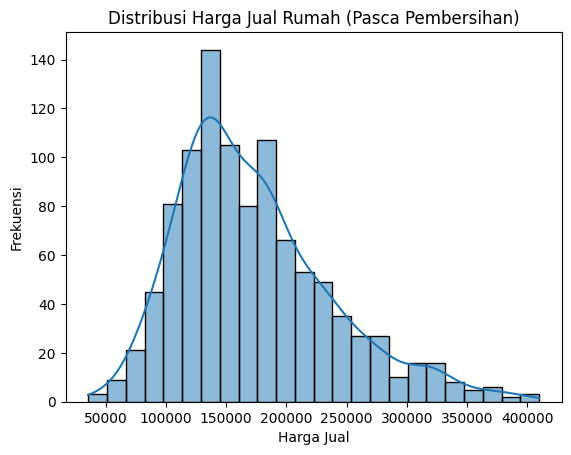

In [ ]:
# Melihat distribusi harga jual rumah
sns.histplot(df_train_clean['SalePrice'], kde=True)
plt.title('Distribusi Harga Jual Rumah (Pasca Pembersihan)')
plt.xlabel('Harga Jual')
plt.ylabel('Frekuensi')
plt.show()


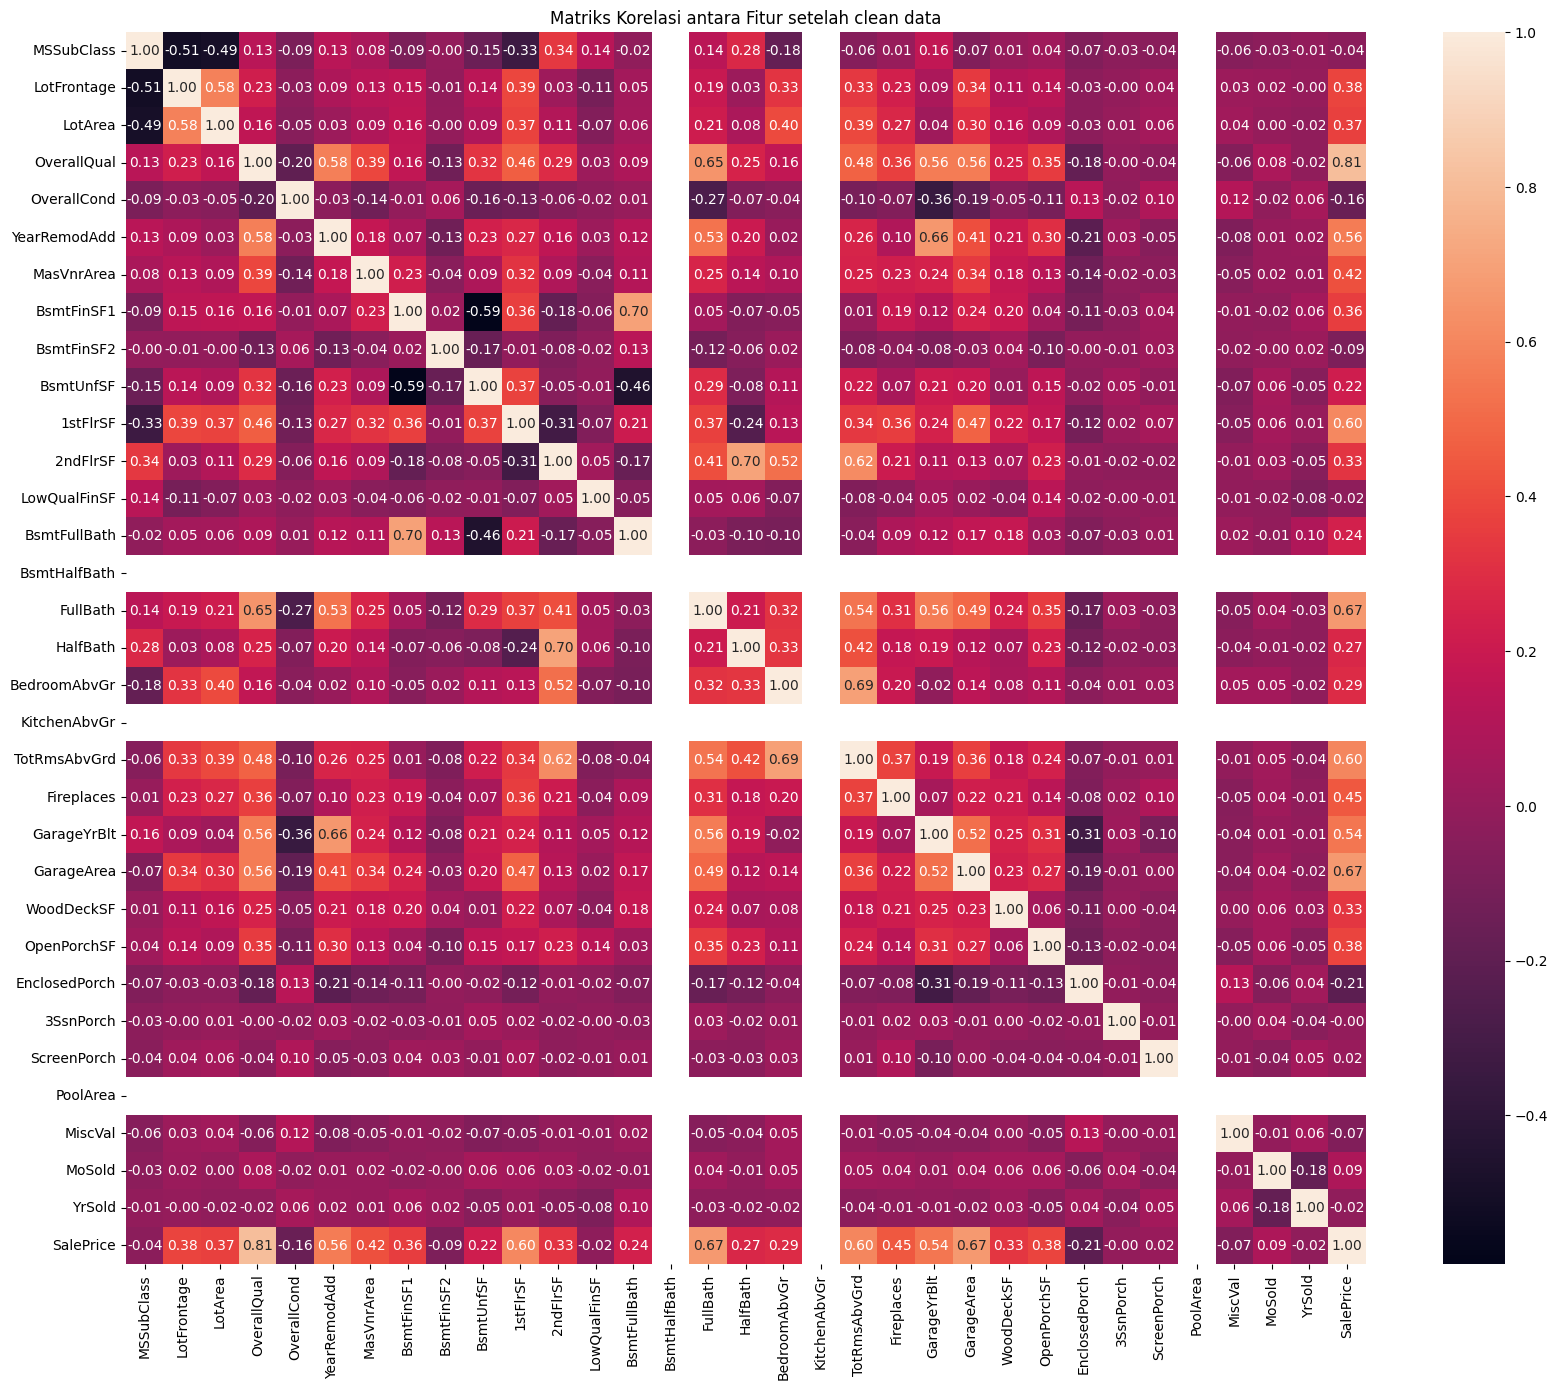

In [ ]:
# Melihat korelasi antara fitur-fitur numerik dengan harga jual
plt.figure(figsize=(20, 16)) #dimensi 12x10
sns.heatmap(df_train_clean[train_numeric_cols].corr(), annot=True,fmt=".2f")
plt.title('Matriks Korelasi antara Fitur setelah clean data')
plt.show()


## Transformation Data

In [ ]:
# Simpan data yang telah di bersihkan di tahap Data Cleaning
df_train_clean.to_csv('train_clean.csv', index=False)
df_test_clean.to_csv('test_clean.csv', index=False)

# 3. **Data Modeling**

##**Preparation Load Dataset (Training & Testing)**


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Muat data pelatihan
train_df = pd.read_csv('train_clean.csv')
train_df = train_df.select_dtypes(include=['number'])
X = train_df.drop('SalePrice', axis=1)  # Asumsikan 'SalePrice' adalah target
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ss = StandardScaler()
# ss.fit(X_train)

# X_train = ss.transform(X_train)
# X_test = ss.transform(X_test)

# Hyperparameter Tuning

## Random Search Cross Validation

In [ ]:
rf = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start=2000, stop=20000, num=10)]
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

random_grid

{'n_estimators': [2000,
  4000,
  6000,
  8000,
  10000,
  12000,
  14000,
  16000,
  18000,
  20000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## Grid Search Cross Validation

In [ ]:
rf_grid = GridSearchCV(estimator=rf, param_grid=random_grid, cv=3, n_jobs=-1, verbose=2)

rf_grid.fit(X_train, y_train)

rf_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'max_depth': 40, 'n_estimators': 600}

##Training Model

In [ ]:
base_model = RandomForestRegressor(n_estimators=10, random_state=42, verbose=True)
base_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42, verbose=True)

In [ ]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(max_depth=80, n_estimators=200)

In [ ]:
best_grid = rf_grid.best_estimator_
best_grid

RandomForestRegressor(max_depth=40, n_estimators=600)

# Evaluate Model

In [ ]:
base_model_score = base_model.score(X_test, y_test)
print('Model Accuracy Training:', round(base_model_score, 4))

Model Accuracy Training: 0.843


In [ ]:
rs_model_score = best_random.score(X_test, y_test)
print('Model Accuracy Training:', round(rs_model_score, 4))

Model Accuracy Training: 0.8631


In [ ]:
gs_model_score = best_grid.score(X_test, y_test)
print('Model Accuracy Training:', round(gs_model_score, 4))

Model Accuracy Training: 0.8613


## Improvements from Base Model

In [ ]:
print('Improvement of Random Search CV: {:0.2f} %'.format( 100 * (round(rs_model_score, 4) - round(base_model_score, 4)) / round(base_model_score, 4)))
print('Improvement of Grid Search CV: {:0.2f} %'.format( 100 * (round(gs_model_score, 4) - round(base_model_score, 4)) / round(base_model_score, 4)))

Improvement of Random Search CV: 2.38 %
Improvement of Grid Search CV: 2.17 %


# Predictions to Cleaned Train Data

## Base Model

In [ ]:
base_model_preds = base_model.predict(X_test)
base_model_preds_train = base_model.predict(X_train)

base_model_preds

array([220140. , 199252. , 283581.9, 246112.2, 142790. , 155549.7,
       269596.1, 199690. , 195670. , 112755.8, 212323. , 173970. ,
       136240. , 260837.8, 151835. , 181550.6, 122390. , 175596.5,
        86650. , 270530. , 181022.8, 119868.4,  90640. , 230500. ,
       128865. , 132425. , 142575. , 123720. , 140130. , 170025. ,
       191790. , 192088.5, 138750. , 210168.9, 182430. , 187750. ,
       108876.6, 123290. ,  75766.1, 187684. ,  96660. , 222562.8,
       235784.2, 139795. , 189585. , 248510. , 186815. , 130945. ,
       215950. , 111533. , 139450. , 131850. , 161043.2, 160140. ,
       194900. , 137990. , 123980. , 135681.4, 143690. , 167716.6,
       262823. , 129290. , 110622.2, 176299. , 235422.7, 134925.8,
       113330. , 136950. , 245009. , 275842.2, 245587.5, 179700. ,
       271066.1, 219553.4, 242420.9, 136190. , 202416.1, 138950. ,
       224450. ,  97450. , 260099.9, 224626.2, 178893.2, 190875. ,
       133140. , 127400. , 153780. , 173940. , 306380. , 11509

## Random Search CV

In [ ]:
rs_model_preds = best_random.predict(X_test)
rs_model_preds_train = best_random.predict(X_train)

rs_model_preds

array([224713.535, 198369.95 , 293611.775, 255993.105, 141751.55 ,
       159014.81 , 265981.46 , 199749.8  , 187897.32 , 116011.48 ,
       205924.775, 188737.5  , 142303.25 , 262172.955, 158781.31 ,
       183827.83 , 122484.5  , 172253.41 ,  87287.   , 288876.43 ,
       185395.885, 117642.3  ,  91685.395, 226681.5  , 129593.765,
       141679.7  , 141290.945, 104574.33 , 141450.14 , 174790.9  ,
       193978.825, 188222.35 , 141229.875, 221733.745, 185314.27 ,
       171994.075, 105665.91 , 128567.54 ,  84846.69 , 165651.145,
        87715.2  , 230651.835, 231248.9  , 131700.5  , 190759.16 ,
       266848.49 , 191248.69 , 127107.295, 212207.91 , 112653.56 ,
       153895.11 , 122227.   , 164551.245, 157687.59 , 193806.07 ,
       141078.18 , 125479.61 , 125560.92 , 135756.05 , 167470.79 ,
       256089.16 , 134873.095,  96097.26 , 175960.055, 246616.05 ,
       134158.205, 111125.36 , 130059.555, 237282.77 , 283931.455,
       244992.04 , 186267.49 , 285816.93 , 214985.28 , 225325.

## Grid Search CV

In [ ]:
gs_model_preds = best_grid.predict(X_test)
gs_model_preds_train = best_grid.predict(X_train)

gs_model_preds

array([221688.04166667, 196277.27833333, 296690.36166667, 255581.44333333,
       141127.43333333, 154709.6       , 266878.69      , 191784.975     ,
       187617.63      , 117853.49166667, 206671.74166667, 187719.65      ,
       142444.375     , 262545.83666667, 155866.39833333, 184668.46      ,
       123843.83333333, 173032.77166667,  85881.40833333, 287275.99      ,
       187191.99333333, 118845.65833333,  94984.98833333, 224441.00333333,
       128919.40166667, 140216.88333333, 142244.50833333, 102543.225     ,
       141989.90833333, 175305.57833333, 193034.275     , 187871.56      ,
       139837.95166667, 224375.76333333, 185981.73666667, 176168.93333333,
       105678.63166667, 128531.54      ,  85541.79      , 164469.63833333,
        85014.41333333, 231559.05666667, 235211.50333333, 132814.985     ,
       189818.70333333, 264832.19833333, 189514.43666667, 127725.51      ,
       217960.54      , 112259.45833333, 154361.92666667, 121970.50166667,
       165385.28      , 1

# R2 Scores: Train vs Test

In [ ]:
from sklearn.metrics import r2_score

## Base Model

In [ ]:
print('Training Score', r2_score(y_train, base_model_preds_train))
print('Test Score    ', r2_score(y_test, base_model_preds))
print('Test - Train  ', (r2_score(y_test, base_model_preds)) - (r2_score(y_train, base_model_preds_train)))

Training Score 0.9752599317214296
Test Score     0.8429614605758945
Test - Train   -0.13229847114553506


## Random Search CV

In [ ]:
print('Training Score', r2_score(y_train, rs_model_preds_train))
print('Test Score    ', r2_score(y_test, rs_model_preds))
print('Test - Train  ', (r2_score(y_test, rs_model_preds)) - (r2_score(y_train, rs_model_preds_train)))

Training Score 0.9819712130426127
Test Score     0.863067327167974
Test - Train   -0.11890388587463874


## Grid Search CV

In [ ]:
print('Training Score', r2_score(y_train, gs_model_preds_train))
print('Test Score    ', r2_score(y_test, gs_model_preds))
print('Test - Train  ', (r2_score(y_test, gs_model_preds)) - (r2_score(y_train, gs_model_preds_train)))

Training Score 0.9823071278950735
Test Score     0.8613216459836904
Test - Train   -0.12098548191138303
